My conditions: Win 11 with WSL, i connect my smartphone with my WSL through my local network using ssh

### Step 1 - Open SSH service in WSL
 
Install the openssh-server in your Unix Terminal, after configure your sshd_config


Installing...
```
sudo apt install openssh-server
```

Editing...
```
sudo nano /etc/ssh/sshd_configs
```

Uncomment or add one port for proxy, after this, verify if `PasswordAuthentication yes` aren't commented.

Start the service with `sudo service ssh start` and verify with `sudo service ssh status`

### Step 2 - Get the IpAdresses and config the proxy between Your Machine - Windows - WSL

Get the WSL IP: `ip a` -> Bash

WARN: If you works with docker, or other services that works with IP and networks, pay attention in the correct ip for your WSL. Futhermore, remember that the WSL ip is dynamic.


The correct IP title in WSL:


Get the Windows IP: `ipconfig` -> PowerShell

Generally your ip title starts with "Adaptador de rede Wifi" or "Adaptador Ethernet Ethernet":
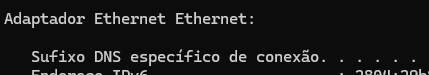

Enable the WSL - Windows proxy rule: `New-NetFirewallRule -DisplayName "WSL SSH" -Direction Inbound -LocalPort 2222 -Protocol TCP -Action Allow`

Enable the portproxy in Windows for external connections: `netsh interface portproxy add v4tov4 listenport=<port_you_choice> listenaddress=0.0.0.0 connectport=<port_you_choice> connectaddress=<your_wsl_ip>`

Verify: `netsh interface portproxy show all`

To remove later: `netsh interface portproxy delete v4tov4 listenport=<port_you_choice> listenaddress=0.0.0.0`

Whith this, you able to connect in your machine!
```
ssh <your_wsl_username>@<your_windows_ip> -p <port_you_choise>
```





### Step 3 - Run the fifo code

Choose one terminal to run the code:
```
python3 <path_of_fifo>/fifo.py
```

In the other, open two windows...
To receive messages: `cat < /tmp/fifow`
To answer messages: `echo '<message>' > /tmp/fifor`

Remember: This is a "ping pong" chat